<a href="https://colab.research.google.com/github/immisius/Advanced-Machine-Learning/blob/main/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Datasets

In [ ]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

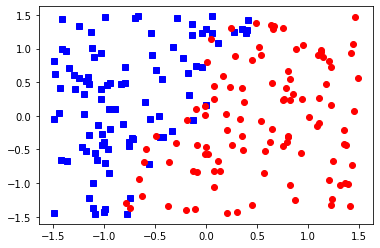

In [ ]:
plt.plot(x_d4[y_d4 < 0, 0],  x_d4[y_d4 < 0, 1], 'bs')
plt.plot(x_d4[y_d4 > 0, 0],  x_d4[y_d4 > 0, 1], 'ro')

In [ ]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

# Problem 1

In [ ]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy

In [ ]:
x_d4_1=np.concatenate([x_d4,np.array([1.0 for i in range(len(x_d4))]).reshape(len(x_d4),1)],1)
loss_hist_batch = [] # to store the history of loss J(w_t)
L=1e-1
lda=1.5
n=100
# implement batch steepest gradient method here
def J(w_t):
  res=lda*w_t@w_t.T
  for i in range(n):
    res+=np.log(1+np.exp(-y_d4[i]*w_t@x_d4_1[i].T))
  return res

wt=np.array([1.0 for i in range(5)])
loss_hist_batch.append(J(wt))
while True:
  before=J(wt)
  djdw=2*lda*wt
  for i in range(n):
    djdw+=np.exp(-y_d4[i]*wt@x_d4_1[i].T)/(1+np.exp(-y_d4[i]*wt@x_d4_1[i].T))*(-y_d4[i]*x_d4_1[i])
  d=-djdw
  wt+=L*d
  after=J(wt)
  loss_hist_batch.append(after)
  if abs(after-before)<=1e-2:
    break

In [ ]:
x_d4_1=np.concatenate([x_d4,np.array([1.0 for i in range(len(x_d4))]).reshape(len(x_d4),1)],1)
loss_hist_newton = [] # to store the history of loss J(w_t)
lda=1.5
n=100
# implement Newton based method here
def J(w_t):
  res=lda*w_t@w_t.T
  for i in range(n):
    res+=np.log(1+np.exp(-y_d4[i]*w_t@x_d4_1[i].T))
  return res

wt=np.array([1.0 for i in range(5)])
loss_hist_newton.append(J(wt))
while True:
  before=J(wt)
  djdw=2*lda*wt
  for i in range(n):
    djdw+=np.exp(-y_d4[i]*wt@x_d4_1[i].T)/(1+np.exp(-y_d4[i]*wt@x_d4_1[i].T))*(-y_d4[i]*x_d4_1[i])
  d2jdw2=2*lda*np.ones([5,5])
  for i in range(n):
    d2jdw2+=(np.exp(-y_d4[i]*wt@x_d4_1[i].T)/(1+np.exp(-y_d4[i]*wt@x_d4_1[i].T))**2)*y_d4[i]**2*x_d4_1[i].reshape(5,1)@x_d4_1[i].reshape(1,5)
  d=-(np.linalg.inv(d2jdw2)@djdw.reshape(-1,1)).squeeze()
  wt+=d
  after=J(wt)
  loss_hist_newton.append(after)
  if abs(after-before)<=1e-2:
    break

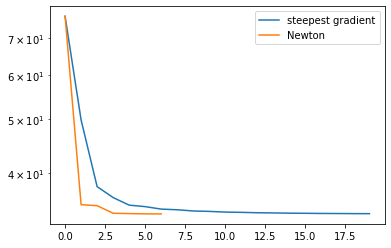

In [ ]:
# plot the result
plt.plot(loss_hist_batch,label='steepest gradient')
plt.plot(loss_hist_newton,label='Newton')
plt.yscale('log')
plt.legend()

In [ ]:
x_d5_1=np.concatenate([x_d5,np.array([1.0 for i in range(len(x_d5))]).reshape(len(x_d5),1)],1)
n=200
loss_hist_batch = [] # to store the history of loss J(w_t)
# def l(W):
#   res=0
#   for i in range(n):
#     res-=W[y_d5[i]]@x_d5_1[i]
#     res+=np.max([W[c]@x_d5_1[i] for c in range(3)])
#   return res
lda=0.1
def l(W):
  res=lda*sum([W[c]@W[c] for c in range(3)])
  for i in range(n):
    res-=W[y_d5[i]]@x_d5_1[i]
    res+=np.log(sum([np.exp(W[c]@x_d5_1[i]) for c in range(3)]))
  return res
Wt=np.array([-i*0.5 for i in range(3*5)]).reshape(3,5).astype(float)
loss_hist_batch.append(l(Wt))
L=1e-3
while True:
  before=l(Wt)
  dldw=np.zeros([3,5])
  for i in range(3):
    dldw[i]=2*lda*Wt[i]
  for i in range(n):
    dldw[y_d5[i]]+=-x_d5_1[i]
    dldw[y_d5[i]]+=np.exp(Wt[y_d5[i]]@x_d5_1[i])/(sum([np.exp(Wt[c]@x_d5_1[i]) for c in range(3)]))*x_d5_1[i]
  d=-dldw
  Wt+=L*d
  after=l(Wt)
  loss_hist_batch.append(after)
  if abs(after-before)<=1e-2 or after>before:
    break

In [ ]:
x_d5_1=np.concatenate([x_d5,np.array([1.0 for i in range(len(x_d5))]).reshape(len(x_d5),1)],1)
n=len(x_d5_1)
loss_hist_newton = [] # to store the history of loss J(w_t)
def l(W):
  res=0
  for i in range(n):
    res-=W[y_d5[i]]@x_d5_1[i]
    res+=np.log(sum([np.exp(W[c]@x_d5_1[i]) for c in range(3)]))
  return res
lda=0.1
j=0
Wt=np.array([-i*0.5 for i in range(3*5)]).reshape(3,5).astype(float)
loss_hist_newton.append(l(Wt))
L=1
while True:
  before=l(Wt)
  dldw=np.zeros([3,5])
  for i in range(3):
    dldw[i]=2*lda*Wt[i]
  for i in range(n):
    dldw[y_d5[i]]+=-x_d5_1[i]
    sumc=sum([np.exp(Wt[c]@x_d5_1[i])for c in range(3)])
    dldw[y_d5[i]]+=np.exp(Wt[y_d5[i]]@x_d5_1[i])/(sumc)*x_d5_1[i]
  d2ldw2=np.ones([3,5,5])*2*lda
  for i in range(n):
    sumc=sum([np.exp(Wt[c]@x_d5_1[i])for c in range(3)])
    square=(x_d5_1[i].reshape(5,1))@(x_d5_1[i].reshape(1,5))
    exp_sum=np.exp(Wt[y_d5[i]]@x_d5_1[i])/sumc
    d2ldw2[y_d5[i]]+=(1-exp_sum)*exp_sum*square
  for i in range(3):
    d=-(np.linalg.inv(d2ldw2[i])@(dldw[i].reshape(-1,1))).squeeze()
    Wt[i]+=L*d
  after=l(Wt)
  loss_hist_newton.append(after)
  if abs(after-before)<=1e-2 or after>before:
    break

In [ ]:
  loss_hist_newton

[1262.1195543412036, 8746.21774981064]

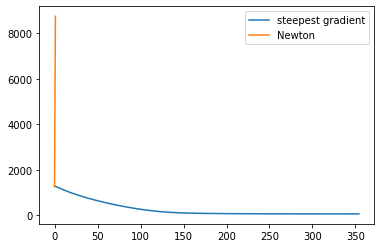

In [ ]:
# plot the result
plt.plot(loss_hist_batch,label='steepest gradient')
plt.plot(loss_hist_newton,label='Newton')
plt.legend()